## Universidad del Valle de Guatemala
### Data science 1
### Laboratorio 2

Integrantes:
* Andrei Portales 19825
* Christian Perez 19710
* Jose Javier Hurtarte 19707

In [1]:
import os
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
# Tecnicamemte no necesario en las nuevas versiones de jupyter
%matplotlib inline


In [2]:
data = pd.read_csv('train.csv')
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
data.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


### Descripcion de los datos
* id: el identificador del tweet
* keyword: una palabra clave del tweet
* location: la ubicacion desde donde fue enviado el tweet
* text: el contenido del tweet
* target: la etiqueta de clasificacion que especifica si el tweet trata de un desastre real (1) o no (0)

In [4]:
# los datos que nos interesan son la del contenido del tweet y si realmente se trata de un desastre o no
# por eso nos quedamos con las columnas text y target
data_train = data[['text', 'target']]
data_train.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7613 non-null   object
 1   target  7613 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.1+ KB


In [6]:
data_train.isnull().sum()

text      0
target    0
dtype: int64

### Preprocesamiento de los datos

In [7]:
# Primero, convertimos todo el texto a minúsculas
data_train['text'] = data_train['text'].apply(lambda x: x.lower())

C:\Users\Christian\AppData\Local\Temp\ipykernel_13728\2806260260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['text'] = data_train['text'].apply(lambda x: x.lower())


In [8]:
# Luego, eliminamos los caracteres especiales
data_train['text'] = data_train['text'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x))

C:\Users\Christian\AppData\Local\Temp\ipykernel_13728\883230481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['text'] = data_train['text'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x))


In [9]:
data_train.head()

,text,target
0,our deeds are the reason of this earthquake ma...,1
1,forest fire near la ronge sask canada,1
2,all residents asked to shelter in place are be...,1
3,13000 people receive wildfires evacuation orde...,1
4,just got sent this photo from ruby alaska as s...,1


In [10]:
# Luego eliminamos las URLs
data_train['text'] = data_train['text'].apply(lambda x: re.sub('http\S+', '', x))

C:\Users\Christian\AppData\Local\Temp\ipykernel_13728\3076578073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['text'] = data_train['text'].apply(lambda x: re.sub('http\S+', '', x))


In [11]:
# print the text where there is a URL
data_train[data_train['text'].str.contains('http')]['text'].values

array(['aftershock protect yourself and profit in the next global financial meltdown by david wiedemer http '],
      dtype=object)

In [12]:
# Luego, utilizando la libreria nltk, eliminamos las stopwords (palabras que no aportan significado al texto) en ingles.
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [13]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Christian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

In [15]:
data_train['text'] = data_train['text'].map(remove_stopwords)

C:\Users\Christian\AppData\Local\Temp\ipykernel_13728\3572501409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['text'] = data_train['text'].map(remove_stopwords)


In [16]:
data_train.head()

,text,target
0,deeds reason earthquake may allah forgive us,1
1,forest fire near la ronge sask canada,1
2,residents asked shelter place notified officer...,1
3,13000 people receive wildfires evacuation orde...,1
4,got sent photo ruby alaska smoke wildfires pou...,1


In [17]:
# Luego eliminamos los números
data_train['text'] = data_train['text'].apply(lambda x: re.sub('\d+', '', x))

C:\Users\Christian\AppData\Local\Temp\ipykernel_13728\266952812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['text'] = data_train['text'].apply(lambda x: re.sub('\d+', '', x))


In [18]:
data_train.head()

,text,target
0,deeds reason earthquake may allah forgive us,1
1,forest fire near la ronge sask canada,1
2,residents asked shelter place notified officer...,1
3,people receive wildfires evacuation orders ca...,1
4,got sent photo ruby alaska smoke wildfires pou...,1


In [19]:
# Verificamos que no haya emojis en el texto
data_train[data_train['text'].str.contains('[^\w\s,]')]['text'].values

array([], dtype=object)

<AxesSubplot:>

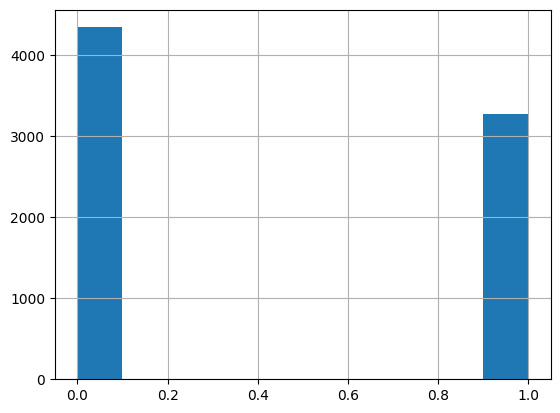

In [20]:
# Verificamos la proporcion de tweets sobre desastres y no desastres
data_train['target'].hist()


In [21]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer

In [22]:

data_pruebas = data_train.copy()
data_pruebas

,text,target
0,deeds reason earthquake may allah forgive us,1
1,forest fire near la ronge sask canada,1
2,residents asked shelter place notified officer...,1
3,people receive wildfires evacuation orders ca...,1
4,got sent photo ruby alaska smoke wildfires pou...,1
...,...,...
7608,two giant cranes holding bridge collapse nearb...,1
7609,ariaahrary thetawniest control wild fires cali...,1
7610,m utckm volcano hawaii,1
7611,police investigating ebike collided car little...,1


In [23]:
# Con la ayuda de nltk, tokenizamos el texto, es decir, separamos las palabras y hacemos una lista
TOKENIZER = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

In [24]:
prueba = data_pruebas['text'][0]
prueba

'deeds reason earthquake may allah forgive us'

In [25]:
prueba = TOKENIZER.tokenize(prueba)
prueba

['deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us']

In [26]:
data_pruebas['text'] = data_pruebas['text'].apply(lambda x: TOKENIZER.tokenize(x))

In [27]:
# Funcion para encontrar la frecuencia en la que aparecen las palabras en los textos
def frequency(text, label):
    freq = {}
    for x, text in zip(label, text):
        for word in text:
            key = (word, x)
            freq[key] = freq.get(key, 0) + 1
    return freq



In [28]:
# Creamos un diccionario con las frecuencias de las palabras en los tweets
dictionary = frequency(data_pruebas['text'], data_pruebas['target'])
dictionary

{('deeds', 1): 1,
 ('reason', 1): 7,
 ('earthquake', 1): 45,
 ('may', 1): 50,
 ('allah', 1): 6,
 ('forgive', 1): 1,
 ('us', 1): 84,
 ('forest', 1): 50,
 ('fire', 1): 180,
 ('near', 1): 47,
 ('la', 1): 24,
 ('ronge', 1): 1,
 ('sask', 1): 1,
 ('canada', 1): 8,
 ('residents', 1): 8,
 ('asked', 1): 1,
 ('shelter', 1): 6,
 ('place', 1): 14,
 ('notified', 1): 1,
 ('officers', 1): 4,
 ('evacuation', 1): 40,
 ('orders', 1): 9,
 ('expected', 1): 11,
 ('people', 1): 105,
 ('receive', 1): 2,
 ('wildfires', 1): 11,
 ('california', 1): 111,
 ('got', 1): 29,
 ('sent', 1): 4,
 ('photo', 1): 18,
 ('ruby', 1): 1,
 ('alaska', 1): 5,
 ('smoke', 1): 12,
 ('pours', 1): 1,
 ('school', 1): 30,
 ('rockyfire', 1): 4,
 ('update', 1): 27,
 ('hwy', 1): 10,
 ('closed', 1): 17,
 ('directions', 1): 1,
 ('due', 1): 24,
 ('lake', 1): 8,
 ('county', 1): 31,
 ('cafire', 1): 2,
 ('flood', 1): 37,
 ('disaster', 1): 117,
 ('heavy', 1): 18,
 ('rain', 1): 30,
 ('causes', 1): 9,
 ('flash', 1): 17,
 ('flooding', 1): 37,
 ('str

In [29]:
# Mostramos las palabras mas frecuentes en los tweets, tanto las que son desastres como las que no lo son.
sorted(dictionary.items(), key=lambda x: x[1], reverse=True)[:20]


[(('like', 0), 253),
 (('im', 0), 248),
 (('amp', 0), 193),
 (('fire', 1), 180),
 (('new', 0), 170),
 (('get', 0), 163),
 (('dont', 0), 154),
 (('news', 1), 140),
 (('one', 0), 128),
 (('via', 1), 121),
 (('disaster', 1), 117),
 (('body', 0), 113),
 (('california', 1), 111),
 (('suicide', 1), 110),
 (('police', 1), 107),
 (('amp', 1), 107),
 (('people', 1), 105),
 (('via', 0), 99),
 (('would', 0), 97),
 (('video', 0), 96)]

### Analisis exploratorio

In [55]:
# Palabra mas frecuente en los tweets que son desastres
palabra_desastre = sorted(dictionary.items(), key=lambda x: x[1], reverse=True)[:5]
palabra_desastrer = [x[0][0] for x in palabra_desastre if x[0][1] == 1]
palabra_desastrer

['fire']

In [56]:
# Palabra mas frecuente en los tweets que no son desastres
palabra_nodesastre = sorted(dictionary.items(), key=lambda x: x[1], reverse=True)[:1]
palabra_nodesastrer = [x[0][0] for x in palabra_nodesastre if x[0][1] == 0]
palabra_nodesastrer

['like']

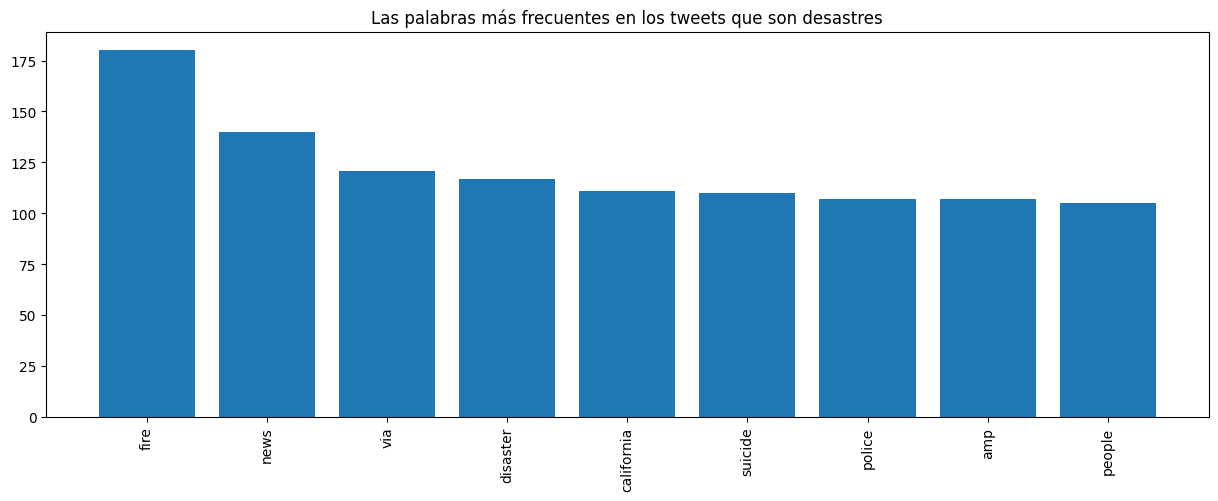

In [54]:
plt.figure(figsize=(15, 5))
plt.bar([x[0][0] for x in sorted(dictionary.items(), key=lambda x: x[1], reverse=True)[:20] if x[0][1] == 1],
        [x[1] for x in sorted(dictionary.items(), key=lambda x: x[1], reverse=True)[:20] if x[0][1] == 1])
plt.xticks(rotation=90)
plt.title('Las palabras más frecuentes en los tweets que son desastres')
plt.show()

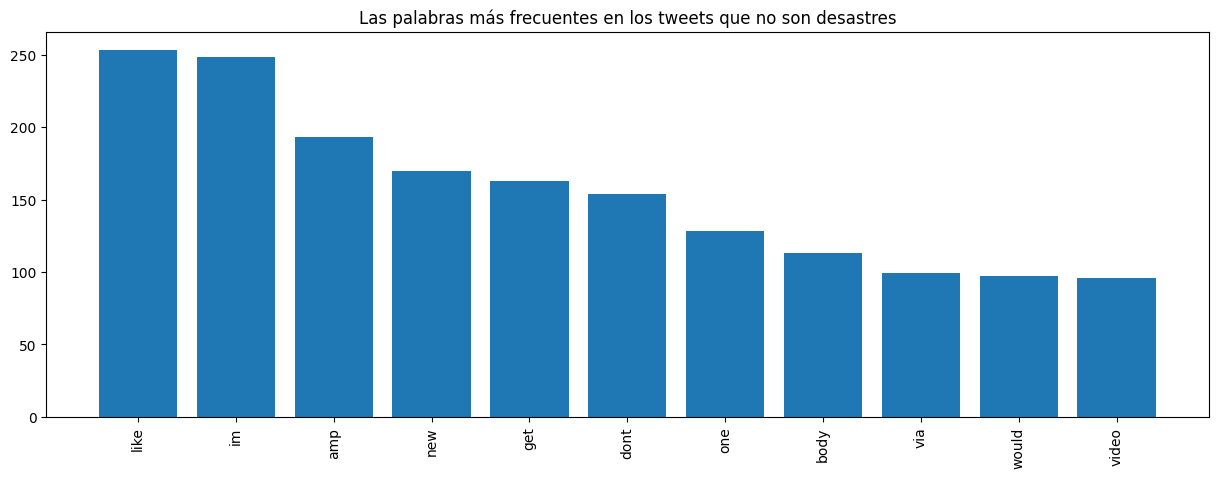

In [53]:
plt.figure(figsize=(15, 5))
plt.bar([x[0][0] for x in sorted(dictionary.items(), key=lambda x: x[1], reverse=True)[:20] if x[0][1] == 0],
        [x[1] for x in sorted(dictionary.items(), key=lambda x: x[1], reverse=True)[:20] if x[0][1] == 0])
plt.xticks(rotation=90)
plt.title('Las palabras más frecuentes en los tweets que no son desastres')
plt.show()

## Modelo de clasificación de sentimientos

Para poder realizar esto se utiliza el api textblob la cual es utiizada para el análisis de sentimientos

In [30]:
data_train

,text,target
0,deeds reason earthquake may allah forgive us,1
1,forest fire near la ronge sask canada,1
2,residents asked shelter place notified officer...,1
3,people receive wildfires evacuation orders ca...,1
4,got sent photo ruby alaska smoke wildfires pou...,1
...,...,...
7608,two giant cranes holding bridge collapse nearb...,1
7609,ariaahrary thetawniest control wild fires cali...,1
7610,m utckm volcano hawaii,1
7611,police investigating ebike collided car little...,1


In [31]:
from textblob import TextBlob

data_train['polarity'] = data_train['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

ModuleNotFoundError: No module named 'textblob'

In [ ]:
# classify the polarity of the text into positive, negative and neutral
def sentiment(polarity):
    if polarity > 0.33:
        return 'positive'
    elif polarity < -0.33:
        return 'negative'
    else:
        return 'neutral'


In [ ]:
data_train['sentiment'] = data_train['polarity'].apply(sentiment)

C:\Users\josej\AppData\Local\Temp\ipykernel_25200\2057510138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['sentiment'] = data_train['polarity'].apply(sentiment)


In [ ]:
data_train

,text,target,polarity,sentiment
0,deeds reason earthquake may allah forgive us,1,0.000000,neutral
1,forest fire near la ronge sask canada,1,0.100000,neutral
2,residents asked shelter place notified officer...,1,-0.100000,neutral
3,people receive wildfires evacuation orders ca...,1,0.000000,neutral
4,got sent photo ruby alaska smoke wildfires pou...,1,0.000000,neutral
...,...,...,...,...
7608,two giant cranes holding bridge collapse nearb...,1,0.000000,neutral
7609,ariaahrary thetawniest control wild fires cali...,1,0.100000,neutral
7610,m utckm volcano hawaii,1,0.000000,neutral
7611,police investigating ebike collided car little...,1,-0.260417,neutral


Podemos ver que ahora el dataset cuenta con 2 nuevas columnas, siendo 1 el puntaje de -1 a 1 del sentimiento del texto, mientras más cercano a 1 sea más positivo será y visceversa. Debido a esto se define un treeshold de que los tweets mayores a 0.5 son positivos, los menores a -0.5 negativos y los que estén entre -0.5 y 0.5 neutros.

c:\Users\josej\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


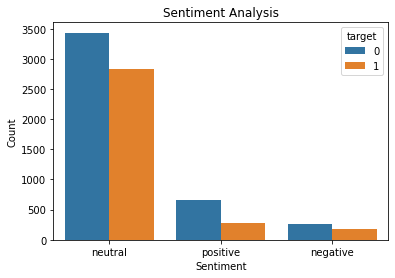

In [ ]:
# plot the sentiment, and add the count of each sentiment to each bar
sns.countplot(data_train['sentiment'], hue=data_train['target'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis')
plt.show()

Cantidad de los tweets basados en sentimiento:

In [ ]:
data_train['sentiment'].value_counts()

neutral     6257
positive     927
negative     429
Name: sentiment, dtype: int64

Vemos que hay más tweets neutrales acerca de la noticia con 6257, luego siguen los positivos  con 927 y finalmente los negativos con 429.

## 10 Tweets más positivos

In [ ]:
# show the tweets with the most positive sentiment
data_train[data_train['sentiment'] == 'positive'].head(10)

,text,target,polarity,sentiment
7,im top hill see fire woods,1,0.50,positive
16,love fruits,0,0.50,positive
17,summer lovely,0,0.50,positive
21,london cool,0,0.35,positive
22,love skiing,0,0.50,positive
23,wonderful day,0,1.00,positive
27,love girlfriend,0,0.50,positive
42,awesome time visiting cfc head office ancop si...,0,0.60,positive
47,building perfect tracklist life leave streets ...,0,1.00,positive
58,sky ablaze tonight los angeles im expecting ig...,0,0.40,positive


# 10 tweets más negativos

In [ ]:
data_train[data_train['sentiment'] == 'negative'].head(10)

,text,target,polarity,sentiment
9,im afraid tornado coming area,1,-0.600000,negative
20,ridiculous,0,-0.333333,negative
62,rene ablaze amp jacinta secret k fallen skies ...,0,-0.400000,negative
67,cant kids cuz got bicycle accident amp split t...,0,-0.666667,negative
97,breaking deadly motorcycle car accident happen...,1,-0.350000,negative
99,car even week got fucking car accident mfs can...,1,-0.600000,negative
122,moment get scary roller coaster guy behind scr...,0,-0.566667,negative
143,horrible accident man died wings airplane,1,-1.000000,negative
145,horrible accident man died wings airplane wat...,1,-1.000000,negative
152,unbelievably insane man airport airplane aircr...,1,-1.000000,negative


Basado en lo anterior observado de la muestra de los tweets tomados, podemos decir que si se logran clasificar correctamente los datos en negativos y negativos

## n-gramas

los datos de unigramas ya se encuentran en el siguiente dataframe:

In [ ]:
data_pruebas

,text,target
0,"[deeds, reason, earthquake, may, allah, forgiv...",1
1,"[forest, fire, near, la, ronge, sask, canada]",1
2,"[residents, asked, shelter, place, notified, o...",1
3,"[people, receive, wildfires, evacuation, order...",1
4,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1
...,...,...
7608,"[two, giant, cranes, holding, bridge, collapse...",1
7609,"[ariaahrary, thetawniest, control, wild, fires...",1
7610,"[m, utckm, volcano, hawaii]",1
7611,"[police, investigating, ebike, collided, car, ...",1


### Bigramas

In [ ]:
# Recurso para los ngramas
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\josej\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
data_train['2-grams'] = data_train['text'].apply(lambda x: TextBlob(x).ngrams(2))

In [ ]:
data_train

,text,target,polarity,sentiment,2-grams
0,deeds reason earthquake may allah forgive us,1,0.000000,neutral,"[[deeds, reason], [reason, earthquake], [earth..."
1,forest fire near la ronge sask canada,1,0.100000,neutral,"[[forest, fire], [fire, near], [near, la], [la..."
2,residents asked shelter place notified officer...,1,-0.100000,neutral,"[[residents, asked], [asked, shelter], [shelte..."
3,people receive wildfires evacuation orders ca...,1,0.000000,neutral,"[[people, receive], [receive, wildfires], [wil..."
4,got sent photo ruby alaska smoke wildfires pou...,1,0.000000,neutral,"[[got, sent], [sent, photo], [photo, ruby], [r..."
...,...,...,...,...,...
7608,two giant cranes holding bridge collapse nearb...,1,0.000000,neutral,"[[two, giant], [giant, cranes], [cranes, holdi..."
7609,ariaahrary thetawniest control wild fires cali...,1,0.100000,neutral,"[[ariaahrary, thetawniest], [thetawniest, cont..."
7610,m utckm volcano hawaii,1,0.000000,neutral,"[[m, utckm], [utckm, volcano], [volcano, hawaii]]"
7611,police investigating ebike collided car little...,1,-0.260417,neutral,"[[police, investigating], [investigating, ebik..."


Podemos ver la creación de lo bigramas para cada uno de los tweets, sin embargo aunque puede ser interesante ver la combinación de varias palabras y como para el tokenizador del modelo solo se utilizan secuencias de entrada de 1 palabra, entonces aunque puede ser interesante verlas, no nos ayudará en este modelo.

## 9. Comparación entre modelos

Para poder realizar esta comparación se utilizó un nuevo modelo de una red neuronal la cual predice el sentimiento utilizando la metrica dada por el analizador de intensidad de sentimientos

In [ ]:

from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences, to_categorical


#basados en ejemplos de clase y https://www.gcptutorials.com/post/how-to-use-sentence-tokenizer-with-keras
def tokenize(data, max_output):
    tokenizer = Tokenizer(num_words=max_output)
    tokenizer.fit_on_texts(data)
    sequences = tokenizer.texts_to_sequences(data)
    tokens = pad_sequences(sequences, maxlen=max_output)
    return tokens

In [ ]:
data_train

,text,target,polarity,sentiment,2-grams,tokens
0,deeds reason earthquake may allah forgive us,1,0.000000,neutral,"[[deeds, reason], [reason, earthquake], [earth...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,forest fire near la ronge sask canada,1,0.100000,neutral,"[[forest, fire], [fire, near], [near, la], [la...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,residents asked shelter place notified officer...,1,-0.100000,neutral,"[[residents, asked], [asked, shelter], [shelte...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,people receive wildfires evacuation orders ca...,1,0.000000,neutral,"[[people, receive], [receive, wildfires], [wil...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,got sent photo ruby alaska smoke wildfires pou...,1,0.000000,neutral,"[[got, sent], [sent, photo], [photo, ruby], [r...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...,...,...,...
7608,two giant cranes holding bridge collapse nearb...,1,0.000000,neutral,"[[two, giant], [giant, cranes], [cranes, holdi...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
7609,ariaahrary thetawniest control wild fires cali...,1,0.100000,neutral,"[[ariaahrary, thetawniest], [thetawniest, cont...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
7610,m utckm volcano hawaii,1,0.000000,neutral,"[[m, utckm], [utckm, volcano], [volcano, hawaii]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
7611,police investigating ebike collided car little...,1,-0.260417,neutral,"[[police, investigating], [investigating, ebik...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


Para poder crear el modelo que predice los sentimientos se convierten estos a enteros


In [ ]:
data_train['sentiment_int'] = data_train['sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})

In [ ]:
data_train['sentiment_int']

0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    2
Name: sentiment_int, Length: 7613, dtype: int64

In [ ]:
#create a new dataset with the tokens and the target
data_tokens = data_train[['text', 'sentiment_int']]
data_tokens

,text,sentiment_int
0,deeds reason earthquake may allah forgive us,1
1,forest fire near la ronge sask canada,1
2,residents asked shelter place notified officer...,1
3,people receive wildfires evacuation orders ca...,1
4,got sent photo ruby alaska smoke wildfires pou...,1
...,...,...
7608,two giant cranes holding bridge collapse nearb...,1
7609,ariaahrary thetawniest control wild fires cali...,1
7610,m utckm volcano hawaii,1
7611,police investigating ebike collided car little...,1


In [ ]:
#divide the dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_tokens.text, data_tokens.sentiment_int, test_size=0.2, random_state=42)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
X_train = tokenize(X_train)
X_test = tokenize(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [ ]:
model = Sequential()
model.add(Embedding(20000, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='relu'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train,
          batch_size=32,
          epochs=15,
          verbose=2,
          validation_data=(X_test, y_test))

Epoch 1/15
191/191 - 18s - loss: 0.4402 - accuracy: 0.7951 - val_loss: 0.3531 - val_accuracy: 0.8326 - 18s/epoch - 94ms/step
Epoch 2/15
191/191 - 14s - loss: 0.3805 - accuracy: 0.8192 - val_loss: 0.3645 - val_accuracy: 0.8326 - 14s/epoch - 75ms/step
Epoch 3/15
191/191 - 14s - loss: 0.3521 - accuracy: 0.8192 - val_loss: 0.3902 - val_accuracy: 0.8326 - 14s/epoch - 74ms/step
Epoch 4/15
191/191 - 15s - loss: 0.3623 - accuracy: 0.8192 - val_loss: 0.3703 - val_accuracy: 0.8326 - 15s/epoch - 77ms/step
Epoch 5/15
191/191 - 14s - loss: 0.3595 - accuracy: 0.8192 - val_loss: 0.4160 - val_accuracy: 0.8326 - 14s/epoch - 75ms/step
Epoch 6/15
191/191 - 14s - loss: 0.3496 - accuracy: 0.8192 - val_loss: 0.4033 - val_accuracy: 0.8326 - 14s/epoch - 74ms/step
Epoch 7/15
191/191 - 14s - loss: 0.3549 - accuracy: 0.8192 - val_loss: 0.3992 - val_accuracy: 0.8326 - 14s/epoch - 73ms/step
Epoch 8/15
191/191 - 14s - loss: 0.3480 - accuracy: 0.8192 - val_loss: 0.3664 - val_accuracy: 0.8326 - 14s/epoch - 74ms/step


Podemos ver que se posee una presición de validación del 82.47% y también una presición de 82.25% utilizando como datos de validación un dataset separado, por lo que podemos decir que si es bastante efectivo al predecir las emociones.